In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# Importing the Libraries

In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory

# Sample Image Visualizaiton

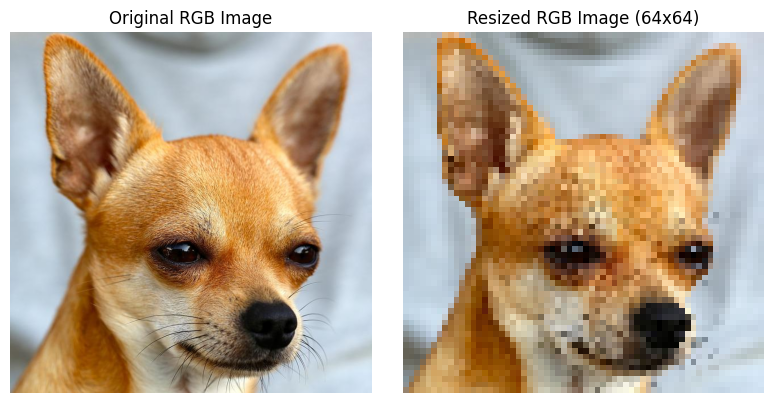

In [ ]:
sample_image_path = '/content/gdrive/My Drive/ml project/muffin vs chihahua/train/chihuahua/img_0_198.jpg'

# Load the original image in RGB
original_image_rgb = cv2.imread(sample_image_path, cv2.IMREAD_COLOR)

# Resize the RGB image to 64x64 pixels
resized_rgb_64x64 = cv2.resize(original_image_rgb, (64, 64))

# Plot the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_rgb_64x64, cv2.COLOR_BGR2RGB))
plt.title('Resized RGB Image (64x64)')
plt.axis('off')

plt.tight_layout()
plt.show()


# Loading the Dataset

In [ ]:
# Define directories for train and test data
train_dir = '/content/gdrive/My Drive/ml project/muffin vs chihahua/train'
test_dir = '/content/gdrive/My Drive/ml project/muffin vs chihahua/test'

# Define image size
image_size = (64, 64)

# Load train and test datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=1,
    shuffle=True)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=1,
    shuffle=False)  # No need to shuffle test data

# Print class names
class_names = train_dataset.class_names
print("Class names:", class_names)

Found 298 files belonging to 2 classes.
Found 6 files belonging to 2 classes.
Class names: ['chihuahua', 'muffin']


# Splitting

In [ ]:
# Extract images and labels from training data
train_images = []
train_labels = []
for images, labels in train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE):
    train_images.extend(images.numpy())
    train_labels.extend(labels.numpy())

# Extract images and labels from test data
test_images = []
test_labels = []
for images, labels in test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE):
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Data Normalization

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (298, 64, 64, 3)
Shape of train_labels: (298,)
Shape of test_images: (6, 64, 64, 3)
Shape of test_labels: (6,)


In [ ]:
print(train_images.min())
print(train_images.max())

0.0
1.0


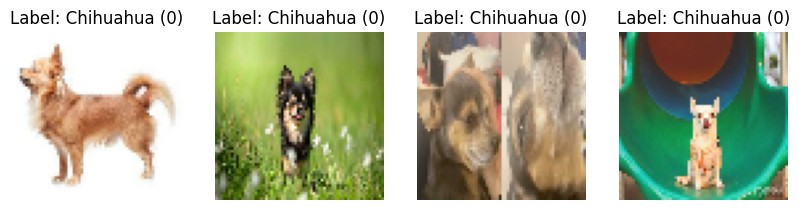

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the number of images to plot
num_images = 4

# Randomly select indices for the images
random_indices = random.sample(range(len(train_images)), num_images)

# Plot the images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_images[idx])

    # Labeling
    numerical_label = train_labels[idx]
    if numerical_label == 1:
        label_name = "Muffin"
    else:
        label_name = "Chihuahua"

    plt.title("Label: {} ({})".format(label_name, numerical_label))
    plt.axis("off")

plt.show()

In [ ]:
train_images[0]

array([[[0.10523897, 0.09347426, 0.06602328],
        [0.11144301, 0.09967831, 0.07222733],
        [0.11436887, 0.10260417, 0.07515319],
        ...,
        [0.12288603, 0.11112133, 0.08367034],
        [0.13137256, 0.11960784, 0.1       ],
        [0.1359375 , 0.12417279, 0.10456495]],

       [[0.09411765, 0.09411765, 0.0627451 ],
        [0.0921875 , 0.0921875 , 0.06081495],
        [0.10980392, 0.09803922, 0.07058824],
        ...,
        [0.13333334, 0.12156863, 0.09411765],
        [0.12748162, 0.11571691, 0.09610907],
        [0.12941177, 0.11764706, 0.09803922]],

       [[0.09270833, 0.08878677, 0.06917892],
        [0.09411765, 0.09019608, 0.07058824],
        [0.0948223 , 0.09090073, 0.07129289],
        ...,
        [0.13137256, 0.11960784, 0.09215686],
        [0.13976716, 0.12800245, 0.10055147],
        [0.14117648, 0.12941177, 0.10196079]],

       ...,

       [[0.67325366, 0.6536458 , 0.6771752 ],
        [0.6745098 , 0.654902  , 0.6784314 ],
        [0.672549  , 0

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(298, 64, 64, 3)
(298,)
(6, 64, 64, 3)
(6,)


# Saving the Preprocessed Data

In [ ]:
import pickle

# Specifying the directory
directory_path = '/content/gdrive/My Drive/ml_project'

# Save train dataset to pickle file
train_data_path = directory_path + 'train.pkl'
train_data = {'train_images': train_images, 'train_labels': train_labels}
with open(train_data_path, 'wb') as f:
    pickle.dump(train_data, f)

# Save test dataset to pickle file
test_data_path = directory_path + 'test.pkl'
test_data = {'test_images': test_images, 'test_labels': test_labels}
with open(test_data_path, 'wb') as f:
    pickle.dump(test_data, f)

# Loading the Preprocessed Data

In [56]:
import pickle

# Directory of the dataset
directory_path = '/content/gdrive/My Drive/ml project/'

# Load train dataset from pickle file
train_data_path = directory_path + 'ml_projecttrain.pkl'
with open(train_data_path, 'rb') as f:
    train_data = pickle.load(f)
train_images_loaded = train_data['train_images']
train_labels_loaded = train_data['train_labels']

# Load test dataset from pickle file
test_data_path = directory_path + 'ml_projecttest.pkl'
with open(test_data_path, 'rb') as f:
    test_data = pickle.load(f)
test_images_loaded = test_data['test_images']
test_labels_loaded = test_data['test_labels']

In [57]:
print("Train images shape:", train_images_loaded.shape)
print("Train labels shape:", train_labels_loaded.shape)
print("Test images shape:", test_images_loaded.shape)
print("Test labels shape:", test_labels_loaded.shape)

Train images shape: (4733, 64, 64, 3)
Train labels shape: (4733,)
Test images shape: (1184, 64, 64, 3)
Test labels shape: (1184,)


In [ ]:
train_images_loaded.max()

1.0

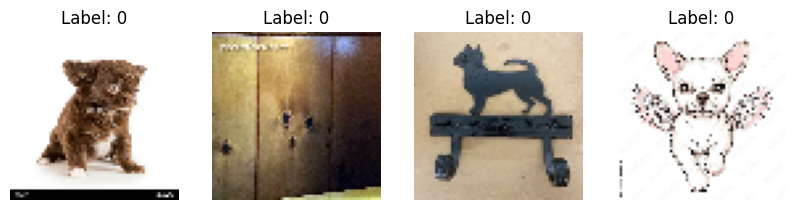

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of images to plot
num_images_to_plot = 4

# Generate random indices for images
random_indices = np.random.choice(len(train_images_loaded), num_images_to_plot, replace=False)

# Plot the randomly selected images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(train_images_loaded[idx])  # Assuming train_images_loaded contains the loaded images
    plt.title(f"Label: {train_labels_loaded[idx]}")
    plt.axis('off')

plt.show()

# AlexNet

In [58]:
from tensorflow.keras import layers, models

def Alexnet_model(input_shape, num_classes=1):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')
    ])
    return model

# ResNet

In [60]:
from tensorflow.keras import layers, models

def identity_block(input_tensor, filters, kernel_size=3):
    x = layers.Conv2D(filters, kernel_size, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x

def conv_block(input_tensor, filters, kernel_size=3, strides=2):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def ResNet_model(input_shape=(64, 64, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, strides=1)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model

# VGG16

In [ ]:
from tensorflow.keras import layers, models

def VGG16_model(input_shape, num_classes=1):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='sigmoid'))  # Use sigmoid for binary classification

    return model

# Training

In [64]:
def save_model_keras(model, name, root_path='/content/gdrive/My Drive/ml project'):
    file_path = root_path + f'/{name}.h5'
    model.save(file_path)
    print(f" Model {name} has been saved. ")

def load_model_keras(name, root_path='/content/gdrive/My Drive/ml project'):
    file_path = root_path + f'/{name}.h5'
    model = tf.keras.models.load_model(file_path)
    model.summary()
    print(f" Model {name} has been saved. ")
    return model

In [62]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

def train_loop_optimized(model, optimizer, x_train, y_train, batch_size, num_epochs, k_fold=5):
    kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)
    all_val_losses = []
    all_val_accuracies = []
    all_zero_one_losses = []

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    for fold, (train_index, val_index) in enumerate(kf.split(x_train), 1):
        print(f'==== Training Fold {fold} ====')
        X_train, X_val = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(
            X_train, y_train_fold,
            validation_data=(X_val, y_val_fold),
            epochs=num_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        val_loss = history.history['val_loss']
        val_accuracy = history.history['val_accuracy']
        zero_one_loss = [1 - acc for acc in val_accuracy]

        best_epoch = np.argmin(val_loss)
        print(f'Best epoch for Fold {fold}: {best_epoch + 1}, Validation Loss: {val_loss[best_epoch]:.4f}, Validation Accuracy: {val_accuracy[best_epoch]:.4f}, Zero-One Loss: {zero_one_loss[best_epoch]:.4f}')

        all_val_losses.append(val_loss)
        all_val_accuracies.append(val_accuracy)
        all_zero_one_losses.append(zero_one_loss)

    df_val_losses = pd.DataFrame(all_val_losses).T
    df_val_accuracies = pd.DataFrame(all_val_accuracies).T
    df_zero_one_losses = pd.DataFrame(all_zero_one_losses).T

    return model, df_val_losses, df_val_accuracies, df_zero_one_losses

In [63]:
from sklearn.model_selection import KFold


input_shape = (64, 64, 3)
num_epochs = 30
batch_size = 128
learning_rates = [0.005, 0.01, 0.1]
model_types = ["AlexNet", "ResNet", "VGG16"]

train_mode = True

for model_type in model_types:
    for learning_rate in learning_rates:
        if train_mode:
            if model_type == "AlexNet":
                model = Alexnet_model(input_shape)
            elif model_type == "VGG16":
                model = VGG16_model(input_shape)
            elif model_type == "ResNet":
                model = ResNet_model(input_shape)

            print(f"Creating the model for {model_type} and learning rate is {learning_rate}")

            optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

            trained_model, df_val_losses, df_val_accuracies, df_zero_one_losses = train_loop_optimized(
                model, optimizer, train_images_loaded, train_labels_loaded, batch_size, num_epochs
            )

            save_model_keras(trained_model, f'{model_type}_{learning_rate}')

Creating the model for ResNet and learning rate is 0.005
==== Training Fold 1 ====
Epoch 1/30
30/30 [==============================] - 16s 226ms/step - loss: 0.6485 - accuracy: 0.6572 - val_loss: 2.4234 - val_accuracy: 0.5491
Epoch 2/30
30/30 [==============================] - 3s 91ms/step - loss: 0.3860 - accuracy: 0.8410 - val_loss: 2.0090 - val_accuracy: 0.5491
Epoch 3/30
30/30 [==============================] - 3s 85ms/step - loss: 0.2589 - accuracy: 0.8930 - val_loss: 1.3721 - val_accuracy: 0.5523
Epoch 4/30
30/30 [==============================] - 3s 90ms/step - loss: 0.1659 - accuracy: 0.9319 - val_loss: 0.8977 - val_accuracy: 0.5702
Epoch 5/30
30/30 [==============================] - 3s 90ms/step - loss: 0.1706 - accuracy: 0.9337 - val_loss: 0.4956 - val_accuracy: 0.7582
Epoch 6/30
30/30 [==============================] - 3s 90ms/step - loss: 0.0948 - accuracy: 0.9662 - val_loss: 1.0994 - val_accuracy: 0.5839
Epoch 7/30
30/30 [==============================] - 3s 91ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Model ResNet_0.005 has been saved. 


In [65]:
def test_loop_optimized(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    zero_one_loss = 1 - accuracy

    print(f'Test Accuracy: {accuracy:.4f}, Zero-One Loss: {zero_one_loss:.4f}')

    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds).astype(int)

    return y_preds

In [66]:
def load_model_keras(name, root_path='/content/gdrive/My Drive/ml project/'):
    file_path = os.path.join(root_path, f'{name}.h5')
    model = tf.keras.models.load_model(file_path)
    model.summary()
    print(f"Model {name} has been loaded.")
    return model

In [67]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt



def plot_and_display_confusion_matrix(cm, classes, normalize=False, title='', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def generate_and_display_confusion_matrix(predictions, true_labels, plot=False):
    classes = [0, 1]
    cm = confusion_matrix(true_labels, predictions, labels=classes)
    if plot:
        plot_and_display_confusion_matrix(cm, classes=classes, normalize=False, title='Confusion Matrix')
    return cm

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_81 (Conv2D)          (None, 32, 32, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_68 (Ba  (None, 32, 32, 64)           256       ['conv2d_81[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_50 (Activation)  (None, 32, 32, 64)           0         ['batch_normalization_68

37/37 [==============================] - 1s 9ms/step
Confusion matrix, without normalization


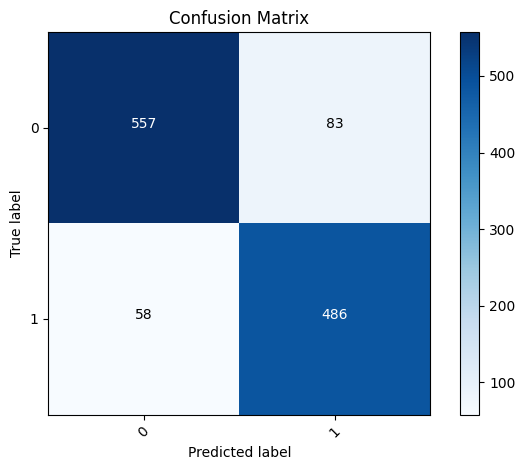

array([[557,  83],
       [ 58, 486]])

In [68]:
# Load the trained model
model = load_model_keras('ResNet_0.005')

# Perform testing
y_preds = test_loop_optimized(model, test_images_loaded, test_labels_loaded)

# Generate and display confusion matrix
generate_and_display_confusion_matrix(y_preds, test_labels_loaded, plot=True)